Alumno: Milton Aldair Martínez Acosta  

Matrícula: 1870354

Estadística Aplicada

Grupo: 051

# 1)

In [117]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

# 2)

In [118]:
churn = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [119]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [120]:
churn['TotalCharges'] = pd.to_numeric(churn.TotalCharges, errors='coerce')

In [121]:
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# 3)

In [122]:
churn[churn.TotalCharges.isna()]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [123]:
churn[churn["tenure"] == 0]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [124]:
churn = churn.dropna(subset=['TotalCharges'])


# 4)

In [125]:
churn.drop_duplicates(inplace=True)

# 5)

In [126]:
#creamos una lista de esas variables
sino = [ 'Partner', 'Dependents','Churn']
#creamos un for para convertirlas juntas, cuando diga yes a 1 y cuando digan No a 0
for i in sino:
 churn[i] = churn[i].map({'Yes':1, 'No':0})

# 6)

In [127]:
churn.describe()

,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,64.798208,2283.300441,0.265785
std,0.368844,0.499729,0.457629,24.545260,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,72.000000,118.750000,8684.800000,1.000000


Para las variables dummys solo me parece relevante la media, porque directamente nos dice el porcentaje de la opción a la que se le asigno el número 1, mientras que las otras nos hablan de distribución de datos pero estas variables solo son 0 y 1.

Partner tiene una media de 0.482509, de este dato podemos interpretar que el 48.25% de nuestros clientes tiene pareja

Dependants tiene una media de 0.298493, de este dato podemos interpretar que el 29.85% de nuestos clientes tiene dependientes económicos

Churn tiene una media de 0.265785, de este dato podemos interpretar que el 26.58% de nuestros clientes han cancelado el servicio de nuestra compañia

# 7)

In [128]:
churn["tenure"].mean()

32.421786120591584

In [129]:
kmf = KaplanMeierFitter()

<AxesSubplot:xlabel='timeline'>

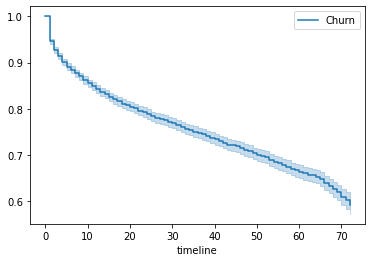

In [130]:
kmf.fit(churn['tenure'], churn['Churn'], label = "Churn").plot()

In [131]:
kmf.survival_function_

,Churn
timeline,
0.0,1.000000
1.0,0.945961
2.0,0.927835
3.0,0.913725
4.0,0.901045
...,...
68.0,0.626858
69.0,0.620135
70.0,0.609657


In [132]:
kmf.median_survival_time_

inf

El modelo nos dice que el valor de la mediana de la supervivencia tiende a infinito, esto puede ser porque este modelo no llega al tiempo en que el que "Churn" llega a 0.5. Comos sabemos, la mediana es el valor que esta al 50% y como en este caso no llegamos hasta ese punto la mediana es indeterminada y el programa nos muestra infinito

# 8)

In [133]:
churn["MonthlyCharges"].median()

70.35

In [134]:
mucho = churn[churn['MonthlyCharges'] > 70.35]
mucht = mucho['tenure']
much= mucho['Churn']

poco = churn[churn['MonthlyCharges'] <= 70.35]
poct = poco['tenure']
poch = poco['Churn']

In [135]:
kmf.fit(mucht, much, label = "mucho")

<lifelines.KaplanMeierFitter:"mucho", fitted with 3513 total observations, 2276 right-censored observations>

In [136]:
kmf.survival_function_


,mucho
timeline,
0.0,1.000000
1.0,0.957301
2.0,0.938069
3.0,0.923023
4.0,0.907532
...,...
68.0,0.556350
69.0,0.547359
70.0,0.536163


In [137]:
kmf.fit(poct, poch, label = "poco")

<lifelines.KaplanMeierFitter:"poco", fitted with 3519 total observations, 2887 right-censored observations>

In [138]:
kmf.survival_function_

,poco
timeline,
0.0,1.000000
1.0,0.934641
2.0,0.917669
3.0,0.904555
4.0,0.894942
...,...
68.0,0.752381
69.0,0.752381
70.0,0.745249


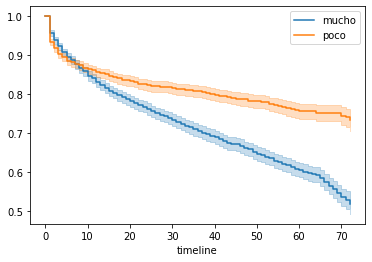

In [139]:
ax = plt.subplot(111)
ax = kmf.fit(mucht, much, label = "mucho").plot(ax=ax)
ax = kmf.fit(poct, poch, label = "poco").plot(ax=ax)

La empresa supone que los que pagan por encima de la mediana (mucho) abandonan el servicio antes.
Nuestros modelos de supervivencia nos sugieren que la suposición de la empresa es correcta ya que el modelo de "mucho" cae más rapido que la de "poco"

Prueba de hipótesis Log - Rank Test

H0: Funciones de supervivencia iguales (mucho = poco)

H1: Funciones de supervivencia distintas (mucho =/ poco)

In [140]:
logrank_test(mucht, poct, event_observed_A = much , event_observed_B = poch)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          91.85 <0.005     69.86

Como el p valor es menor a 0.005 tambien es menor al nivel de significancia del 5%, entonces, rechazamos H0. Por lo tanto, concluimos que los clientes que pagan por debajo de la mediana y los que pagan por encima de la mediana no tienen la misma función de supervivencia.

# 9)

In [142]:
dsl = churn[churn['InternetService'] == "DSL"]
dslt = dsl['tenure']
dslc = dsl['Churn']

fibra = churn[churn['InternetService'] == "Fiber optic"]
fibrat = fibra['tenure']
fibrac = fibra['Churn']

no = churn[churn['InternetService'] == "No"]
note = no['tenure']
noch = no['Churn']

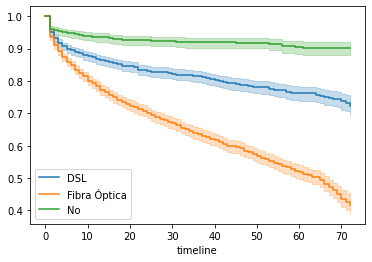

In [143]:
ax = plt.subplot(111)
ax = kmf.fit(dslt, dslc, label = "DSL").plot(ax=ax)
ax = kmf.fit(fibrat, fibrac, label = "Fibra Óptica").plot(ax=ax)
ax = kmf.fit(note, noch, label = "No").plot(ax=ax)

Es claro que los clientes que no tienen internet abandonan menos rapido la empresa, sin embargo yo no diria que tener internet es la causa de que abandonen como tal

Los clientes que abandonan más rapido son los que tienen contratada fibra óptica

Para explicar porque, filtraré a los clientes con fibra óptica para obtener más información.

In [144]:
fibra = churn['InternetService'] == "Fiber optic"

In [145]:
fibradb = churn[fibra]
fibradb.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,9237-HQITU,Female,0,0,0,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,0,0,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,1452-KIOVK,Male,0,0,1,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
8,7892-POOKP,Female,0,1,0,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
12,8091-TTVAX,Male,0,1,0,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,0


Nótese que los pagos mensuales de los clientes que tienen fibra óptica rondan entre los 70 y los 105 dolares, mientras que los de DSL van entre 50 y 80, y los que no tienen internet van entre 20 y 25. A que voy con esto

Ahora, es claro ver que las personas que tiene fibra óptica forman parte de los que "pagan mucho" y ya demostramos que esas personas abandonan la empresa más rapido

# 10)

In [146]:
categoricas = ['gender','PhoneService','MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling', 'PaymentMethod']
for i in categoricas:
    churn[i] = churn[i].astype('category')
    churn[i] = churn[i].cat.codes

In [147]:
cph = CoxPHFitter()

In [148]:
churn.drop('customerID', inplace=True, axis=1)


In [149]:
cph.fit(churn, duration_col='tenure', event_col='Churn')


<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>

In [150]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7032
number of events observed = 1869
   partial log-likelihood = -12679.32
         time fit was run = 2022-05-17 22:10:55 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
gender            -0.04       0.96       0.05            -0.13             0.05                 0.88                 1.05
SeniorCitizen      0.04       1.04       0.06            -0.07             0.15                 0.93                 1.16
Partner           -0.18       0.84       0.05            -0.28            -0.07                 0.75                 0.93
Dependents        -0.09       0.91       0.07            -0.23             0.04                 0.80                 1.04
PhoneService      -0.21       0.81       0.12            -0.44             0.02                 0.64                 1.02
MultipleLines     -0.08       0.92       0.03            -0.13            -0.03                 0.88                 0.97
InternetService   -0.20       0.82       0.06            -0.31            -0.08                 0.73                 0.92
OnlineSecurity    -0.22       0.80       0.03            -0.29            -0.16                 0.75                 0.85
OnlineBackup      -0.15       0.86       0.03            -0.20            -0.09                 0.82                 0.91
DeviceProtection  -0.07       0.93       0.03            -0.13            -0.02                 0.88                 0.98
TechSupport       -0.16       0.85       0.03            -0.23            -0.10                 0.80                 0.91
StreamingTV       -0.09       0.91       0.03            -0.15            -0.04                 0.86                 0.96
StreamingMovies   -0.09       0.91       0.03            -0.15            -0.04                 0.86                 0.96
Contract          -1.63       0.20       0.08            -1.79            -1.47                 0.17                 0.23
PaperlessBilling   0.15       1.17       0.06             0.04             0.26                 1.04                 1.30
PaymentMethod      0.20       1.22       0.03             0.15             0.25                 1.16                 1.29
MonthlyCharges     0.06       1.06       0.00             0.06             0.07                 1.06                 1.07
TotalCharges      -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00

                   cmp to      z      p   -log2(p)
covariate                                         
gender               0.00  -0.91   0.36       1.46
SeniorCitizen        0.00   0.69   0.49       1.02
Partner              0.00  -3.20 <0.005       9.48
Dependents           0.00  -1.33   0.18       2.45
PhoneService         0.00  -1.81   0.07       3.84
MultipleLines        0.00  -2.97 <0.005       8.37
InternetService      0.00  -3.39 <0.005      10.46
OnlineSecurity       0.00  -6.69 <0.005      35.40
OnlineBackup         0.00  -5.45 <0.005      24.24
DeviceProtection     0.00  -2.72   0.01       7.25
TechSupport          0.00  -5.02 <0.005      20.90
StreamingTV          0.00  -3.29 <0.005       9.98
StreamingMovies      0.00  -3.25 <0.005       9.77
Contract             0.00 -19.77 <0.005     286.45
PaperlessBilling     0.00   2.72   0.01       7.27
PaymentMethod        0.00   7.31 <0.005      41.71
MonthlyCharges       0.00  27.12 <0.005     535.51
TotalCharges         0.00 -38.96 <0.005        inf
---
Concordance = 0.93
Partial AIC = 25394.64
log-likelihood ratio test = 5947.44 on 18 df
-log2(p) of ll-ratio test = inf

<AxesSubplot:xlabel='log(HR) (95% CI)'>

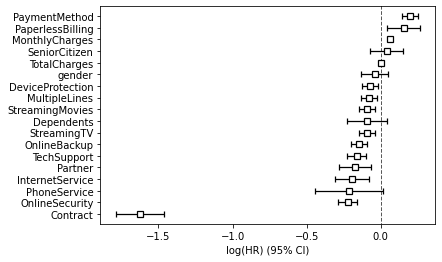

In [151]:
cph.plot()

Solo interpretaré las variables significativas, ya que las otras no afectan al modelo. Podemos saber cuales son viendo en el summary la columna del p value, si es menor a 0.05 que es nuestro nivel de significancia, la variable es significativa

Variables significativas:
Partner, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges

(14 variables significativas)

**Interpretacion coeficientes**

En el summary no salia el coeficiente de TotalCharges, asi que lo buscamos manualmente. El resto los seguiremos redondeando a 2 decimales.

In [152]:
print(cph.params_)

covariate
gender             -0.042340
SeniorCitizen       0.038640
Partner            -0.175421
Dependents         -0.092727
PhoneService       -0.213339
MultipleLines      -0.078760
InternetService    -0.195869
OnlineSecurity     -0.223397
OnlineBackup       -0.147835
DeviceProtection   -0.073736
TechSupport        -0.163388
StreamingTV        -0.092947
StreamingMovies    -0.091458
Contract           -1.627545
PaperlessBilling    0.153771
PaymentMethod       0.198680
MonthlyCharges      0.060865
TotalCharges       -0.001590
Name: coef, dtype: float64


Recordemos que en este modelo trabajamos con el logaritmo de la función de riesgo, por lo tanto

100*(e^ci-1) proporciona el cambio en porcentaje para nuestra función de riesgo donde ci es el i-ésimo coeficiente


(la operación la hice con la calculadora)

Variable(coeficiente): explicación

1.Partner(-0.18): tener pareja reduce el riesgo de que cancelen el servicio en 16.47%.

2.MultipleLines(-0.08): tener más de una línea telefónica reduce el riesgo de que cancelen el servicio en 7.69%.

3.InternetService(-0.20): tener servicio de internet reduce el riesgo de que cancelen el servicio en 18.13%.

4.Online Security(-0.22): tener seguridad en línea reduce el riesgo de que cancelen el servicio en 19.75%.

5.OnlineBackup(-0.15): tener respaldo de información en la nube reduce el riesgo de que cancelen el servicio en 13.93%.

6.DeviceProtection(-0.07): tener protección para el dispositivo reduce el riesgo de que cancelen el servicio en 6.76%.

7.Tech Support(-0.16): tener soporte técnico reduce el riesgo de que cancelen el servicio en 14.78%.

8.StreamingTV(-0.09): tener servicio de televisión en streaming reduce el riesgo de que cancelen el servicio en 8.61%.

9.StreamingMovies(-0.09): tener servicio de películas en streaming reduce el riesgo de que cancelen el servicio en 8.61%.

10.Contract(-1.63): el tipo de contrato reduce el riesgo de que cancelen el servicio en 80.41%.

11.PaperlessBilling(0.15): no recibir recibo físico aumenta el riesgo de que cancelen el servicio en 16.18%.

12.PaymentMethod(0.20)_ el método de pago puede llegar a aumentar el riesgo de que cancelen el servicio en 22.14%.

13.MonthlyCharges(0.06): el monto cobrado por mes aumento el riesgo de que cancelen el servicio en 6.18%.

14.Total Charges(-0.00159): el cobro total disminuye el riesgo de que cancelen el servicio en 0.1589%

El **coeficiente de MonthlyCharges** nos dice que el monto cobrado por mes aumenta el riesgo de que cancelen el servicio, lo cual efectivamente coincide con la conclusión de 8)

Sin embargo, en el punto 8 parecia que era un coeficiente muy relevante, pero en el modelo de cox solo afecta un 6.18%

# 11)

Para dar estrategias primero debemos saber que variables son las que mas afectan al riesgo de que cancelen el servicio, en el analisis anterior vimos que eran PaymentMethod, Contract, InternetService y OnlineSecurity.

(PaymentMethod) Tenemos que averiguar cual es el método de pago que diminuye el riesgo de que cancelen el servicio, una vez conocida esa información, podemos crear una promoción con un descuento para los clientes que registren ese método de pago.

(Contract) Tenemos que averiguar cual es el tipo de contrato que disminuye el riesgo de que cancelen el servicio, una vez conocida esa información, deberiamos siempre proponer esa duración al cliente cuando haga su contrato.

(InternetService & OnlineSecurity) Igual podriamos hacer una promoción de descuento si contratan cualquiera de estos servicios e incluso otra promoción aun mejor si contratan ambos.